Estimate errors in the adjusted limit
Only use the 40&50 entries in the table.
Aim for a grid of pairs of values for the 40&50 offsets.
No need for interp - can just do a simple straight-line


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def correct_estimated(ofst40, ofst50, raw):
    """Return corrected pressure from the given offsets"""
    # Perhaps make into a closure?
    # TODO
    est40 = 40 - ofst40
    est50 = 50 - ofst50
    m = (est50 - est40) / (50 - 40)
    c = est40 - m * 40
    return m * raw + c

In [ ]:
def do_one_point(ofst50, new_ofst50):
    ofst40 = 0
    # Given that the corrected pressure is 54, what is the estimated pressure
    # given by st-line through estimated 40&50
    est40 = 40 - ofst40
    est50 = 50 - ofst50
    m = (est50 - est40) / (50 - 40)
    c = est40 - m * 40
    e54 = m * 54 + c
    # now use this to calculate the right corrected threshold
    right_threshold = correct_estimated(ofst40, new_ofst50, e54)
    # wrong threshold from the new correction value
    wrong_threshold = correct_estimated(ofst40, new_ofst50, 54)
    # and there we have the error to put into the table
    return right_threshold - wrong_threshold    

In [29]:
errors = np.zeros(21*21).reshape(21,21)  # -10 to +10
for ofst50 in range(-10,11):
    for new_ofst50 in range(-10,11):
        ofst40 = 0
        # ofst50 = +10
        # Given that the corrected pressure is 54, what is the estimated pressure
        # given by st-line through estimated 40&50
        est40 = 40 - ofst40
        est50 = 50 - ofst50
        m = (est50 - est40) / (50 - 40)
        c = est40 - m * 40
        e54 = m * 54 + c
        #55 - (ofst50 - ofst40) * 15 / 10
        # now use this to calculate the right corrected threshold
        # new_ofst50 = 6
        right_threshold = correct_estimated(ofst40, new_ofst50, e54)

        wrong_threshold = correct_estimated(ofst40, new_ofst50, 54)
        # and there we have the error to put into the table

        errors[ofst50 + 10, new_ofst50 + 10] = right_threshold - wrong_threshold
#print(right_threshold, wrong_threshold, e54-54)
#print(errors)

[[ 28.    26.6   25.2   23.8   22.4   21.    19.6   18.2   16.8   15.4   14.
   12.6   11.2    9.8    8.4    7.     5.6    4.2    2.8    1.4    0.  ]
 [ 25.2   23.94  22.68  21.42  20.16  18.9   17.64  16.38  15.12  13.86
   12.6   11.34  10.08   8.82   7.56   6.3    5.04   3.78   2.52   1.26
    0.  ]
 [ 22.4   21.28  20.16  19.04  17.92  16.8   15.68  14.56  13.44  12.32
   11.2   10.08   8.96   7.84   6.72   5.6    4.48   3.36   2.24   1.12
    0.  ]
 [ 19.6   18.62  17.64  16.66  15.68  14.7   13.72  12.74  11.76  10.78
    9.8    8.82   7.84   6.86   5.88   4.9    3.92   2.94   1.96   0.98
    0.  ]
 [ 16.8   15.96  15.12  14.28  13.44  12.6   11.76  10.92  10.08   9.24
    8.4    7.56   6.72   5.88   5.04   4.2    3.36   2.52   1.68   0.84
    0.  ]
 [ 14.    13.3   12.6   11.9   11.2   10.5    9.8    9.1    8.4    7.7    7.
    6.3    5.6    4.9    4.2    3.5    2.8    2.1    1.4    0.7    0.  ]
 [ 11.2   10.64  10.08   9.52   8.96   8.4    7.84   7.28   6.72   6.16
    5.6    5

In [31]:
errors.shape

(21, 21)

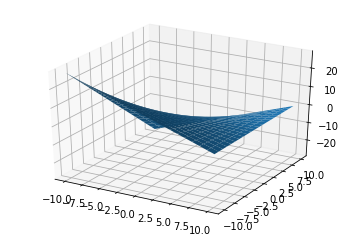

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.arange(-10, 11)
Y = np.arange(-10, 11)
Xs, Ys = np.meshgrid(X, Y)
#Xs = np.array(range(-10,11))
ax.plot_surface(Xs, Ys, errors);
t=0
for x in Xs: t=t+x

In [35]:
Xs.shape

array([-210, -189, -168, -147, -126, -105,  -84,  -63,  -42,  -21,    0,
         21,   42,   63,   84,  105,  126,  147,  168,  189,  210])